In [113]:
#importing libraries
import pandas as pd
import numpy as np               # For mathematical calculations 
from sklearn.preprocessing import LabelEncoder # convert categorical variables to numerical
import matplotlib.pyplot as plt  # For plotting graphs 
import statsmodels.api as sm     # To predict timeseries
import itertools
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [114]:
tsdata = pd.read_excel('DATASET SAMPLE.xlsx') #reading the dataset

In [115]:
tsdata.head() #preview of the dataset

,YEAR,Sub Category,Model YEAR,Cost
0,2017,A,2015,280.0
1,2017,A,2012,300.0
2,2017,B,2020,150.0
3,2017,B,2018,200.0
4,2017,B,2000,500.0


In [116]:
le = LabelEncoder()
label = le.fit_transform(tsdata['Sub Category'])

tsdata.drop("Sub Category", axis=1, inplace=True)
tsdata["Sub Category"] = label
tsdata.head(5)


,YEAR,Model YEAR,Cost,Sub Category
0,2017,2015,280.0,0
1,2017,2012,300.0,0
2,2017,2020,150.0,1
3,2017,2018,200.0,1
4,2017,2000,500.0,1


In [117]:
tsdata.shape

(188, 4)

In [118]:
tsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YEAR          188 non-null    int64  
 1   Model YEAR    188 non-null    int64  
 2   Cost          188 non-null    float64
 3   Sub Category  188 non-null    int32  
dtypes: float64(1), int32(1), int64(2)
memory usage: 5.3 KB


In [119]:
tsdata.isnull().sum()

YEAR            0
Model YEAR      0
Cost            0
Sub Category    0
dtype: int64

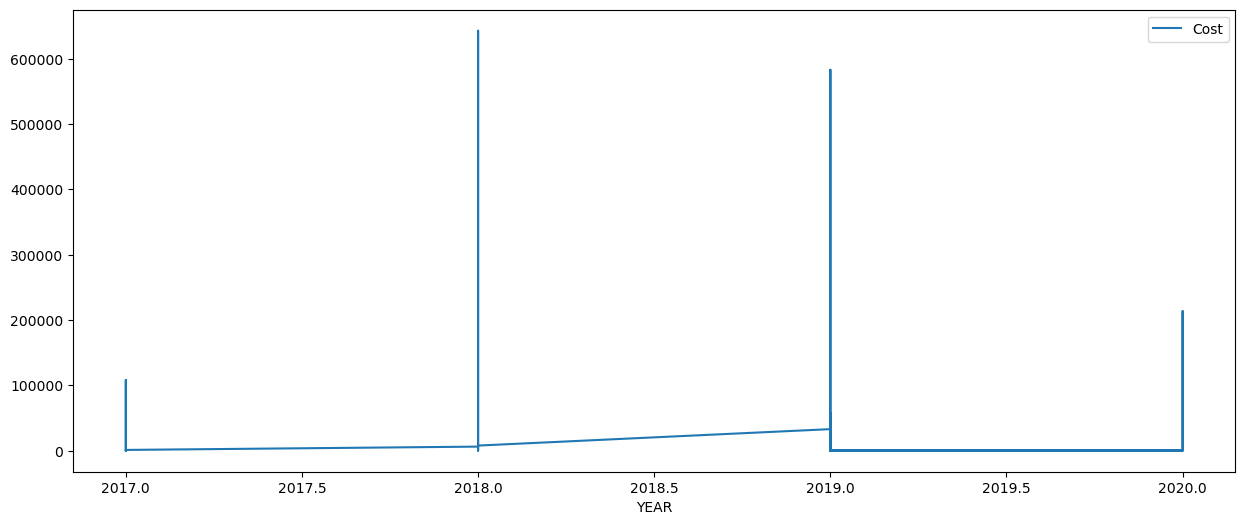

In [120]:
tsdata1.plot(figsize=(15, 6)) #plotting the dataset

plt.show()

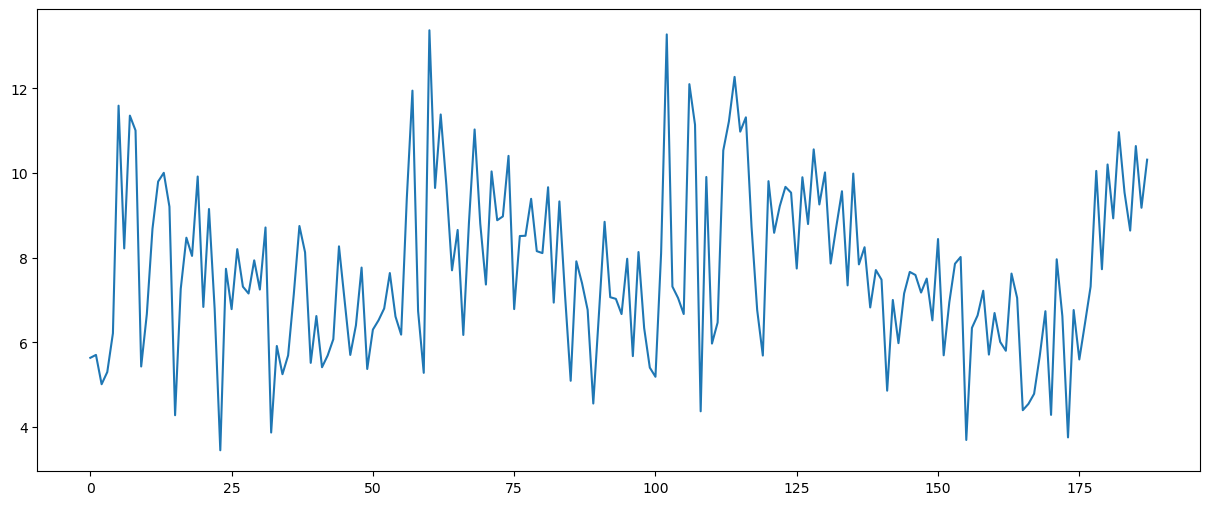

In [121]:
df1 = tsdata['Cost'].apply(np.log) #getting the log transformations to attain stationarity
df1 = np.log(tsdata['Cost']) # equivalent
df1.plot(figsize=(15,6))
plt.show()

In [122]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [123]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df1, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1315.5492927413427
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1170.4355364472174
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:844.1803864871667
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:779.0361882022103
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:927.0421909452787
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:864.5444018639305
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:817.7430985500971
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:778.8781559913292
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1132.080003145651
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1048.9494649063358
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:831.4206532363256
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:763.0860645164728
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:905.1428476974021
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:841.5103873148014
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:795.9661649436897
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:763.4590177199673
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:834.3456728651054
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:836.25603833405
ARIMA(0, 

In [124]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(df1, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 1, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0826      0.101      0.814      0.415      -0.116       0.281
ma.L1         -0.7964      0.063    -12.550      0.000      -0.921      -0.672
ar.S.L12       0.0369      0.095      0.389      0.697      -0.149       0.223
ma.S.L12      -0.9542      0.223     -4.281      0.000      -1.391      -0.517
sigma2         3.5355      0.682      5.185      0.000       2.199       4.872


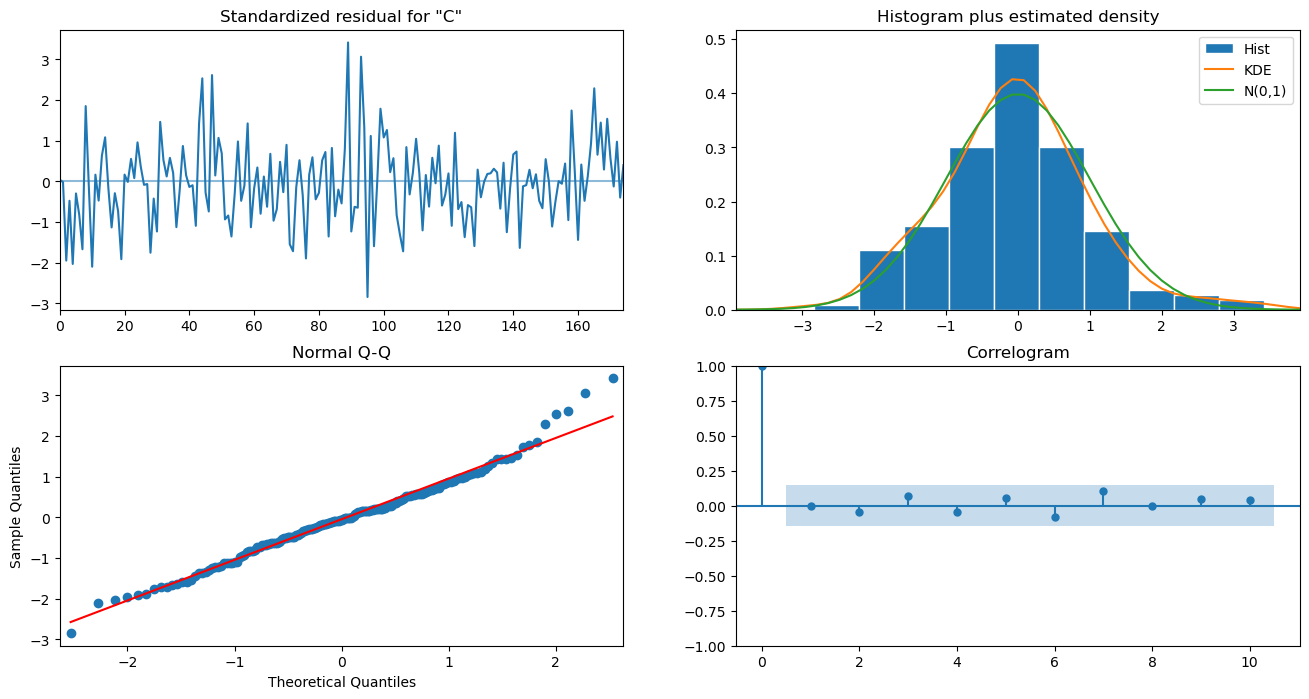

In [125]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (16, 8))
plt.show()

# Observation
 - From the plots, it shows that our model is perfect, evident from the histogram which is normally distributed.

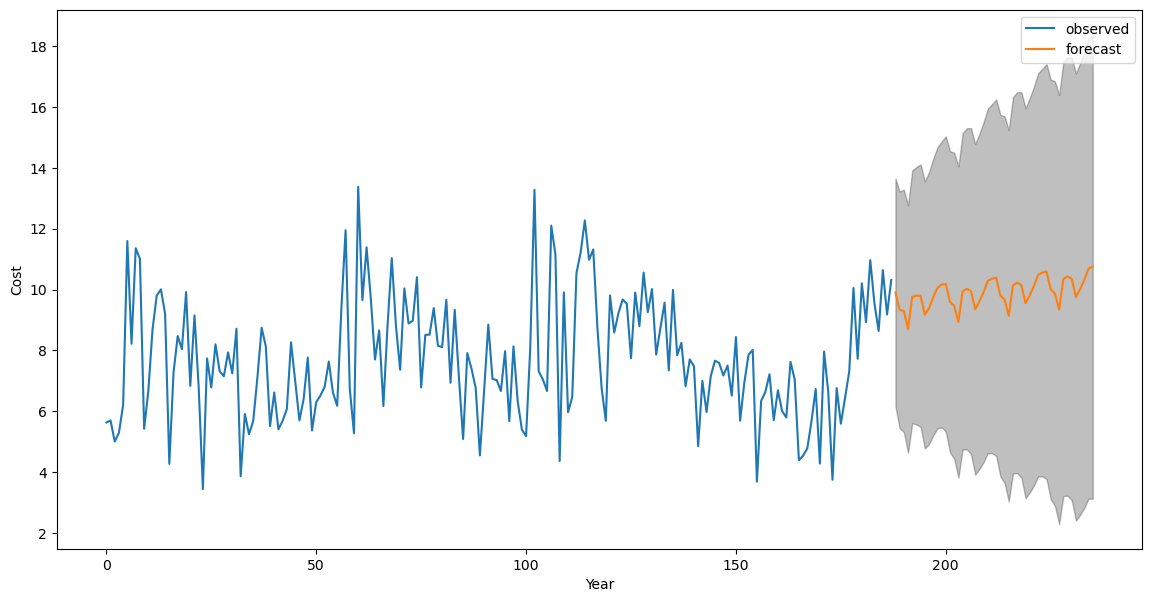

In [126]:
# forcasting for the 4 years (4*12)
pred_uc = result.get_forecast(steps = 48)
pred_ci = pred_uc.conf_int()

ax = df1.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Year')
ax.set_ylabel('Cost')

plt.legend()
plt.show()

# Summary
- Our model clearly captured Cost seasonality.
- As we forecast further out into the future, it is natural for us to become less confident in our values.
- This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.